# Llama 3.2 Multimodal Prompting

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note <code>(Kernel Starting)</code>:</b> This notebook takes about 30 seconds to be ready to use. You may start and watch the video while you wait.</p>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
import sys
#!{sys.executable} -m pip install python-dotenv
#!{sys.executable} -m pip install wolframalpha
#!{sys.executable} -m pip install Pillow
!{sys.executable} -m pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 2.0 MB/s eta 0:00:0000:0100:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 2.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 2.0 MB/s eta 0:00:0000:0100:01
Using cached pyparsing-3.1.4-py3-none-any.whl (104 kB)


In [12]:
from utils import load_env
load_env()

## Text input only question

In [13]:
from utils import llama32
from utils import llama31

<p style="background-color:#fff6ff; padding:15px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px"> 💻 &nbsp; <b>Access <code>requirements.txt</code> and <code>utils.py</code> files:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Open"</em>. For more help, please see the <em>"Appendix - Tips and Help"</em> Lesson.</p>

In [14]:
messages = [
  {"role": "user",
    "content": "Who wrote the book Charlotte's Web?"}
]

In [15]:
response_32 = llama32(messages, 90)
print(response_32)

The book "Charlotte's Web" was written by E.B. White.


In [16]:
response_31 = llama31(messages,70)
print(response_31)

The book "Charlotte's Web" was written by E.B. White.


## Reprompting with new question

In [17]:
messages = [
  {"role": "user",
    "content": "Who wrote the book Charlotte's Web?"},
      {"role": "assistant",
    "content": response_32},
      {"role": "user",
    "content": "3 of the best quotes"}
]

In [18]:
response_32 = llama32(messages,90)
print(response_32)

Here are three of the most famous and beloved quotes from "Charlotte's Web":

1. **"You have been my friend," replied Charlotte. "That in itself is a tremendous thing. I wove my webs for you because I liked you. After all, what's a life anyway? We're born, we live a little while, we die. A spider's life can't help being something of a mess, with all this hustling and bustling about, trying to find something to eat and a place to sleep, and then, of course, there's the web. But I wouldn't trade it. It's a pretty good life, if you ask me."**

— Charlotte (Chapter 21)

2. **"It is not often that someone comes along who is a true friend and a good writer. Charlotte was both."**

— Narrator (Chapter 22)

3. **"You've got a friend in me, Wilbur."**

— Charlotte (Chapter 9)

These quotes capture the essence of the story, highlighting the themes of friendship, loyalty, and the fleeting nature of life.


In [19]:
response_31 = llama31(messages,70)
print(response_31)

1. "You have been my friend," replied Charlotte. "That in itself is a tremendous thing. I wove my webs for you because I liked you. After all, what's a life anyway? We're born, we live a little while, we die. A spider's life can't help being something of a mess, with all this hurrying backward and forward, leaving you breathless and bewildered and dying, and dying, and dying."

2. "It is not often that someone comes along who is a true friend and a good writer. Charlotte was both."

3. "You've got a friend in me."


## Question about an image

In [20]:
from utils import disp_image

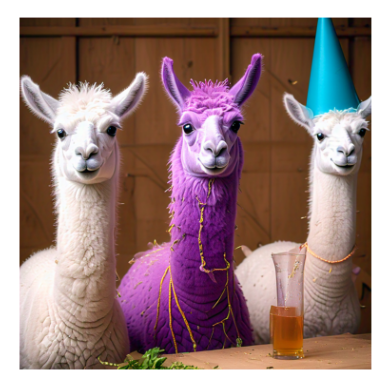

In [21]:
disp_image("images/Llama_Repo.jpeg") # Example usage for local image

### Image from a URL

In [22]:
image_url = ("https://raw.githubusercontent.com/meta-llama/"
            "llama-models/refs/heads/main/Llama_Repo.jpeg")
messages = [
  {"role": "user",
    "content": [
      {"type": "text",
        "text": "describe the image in one sentence"
      },
      {"type": "image_url",
        "image_url": {"url": image_url}
      }
    ]
  },
]

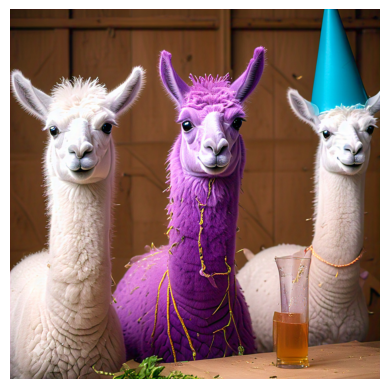

The image depicts three llamas, one of which is purple and wearing a party hat, standing behind a table with a glass of beer on it.


In [23]:
disp_image(image_url)
result = llama32(messages,90)
print(result)

### Using a local image

In [24]:
import base64

def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')
base64_image = encode_image("images/Llama_Repo.jpeg")

In [25]:
messages = [
  {"role": "user",
    "content": [
      {"type": "text",
        "text": "describe the image in one sentence"
      },
      {"type": "image_url",
        "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"}
      }
    ]
  },
]

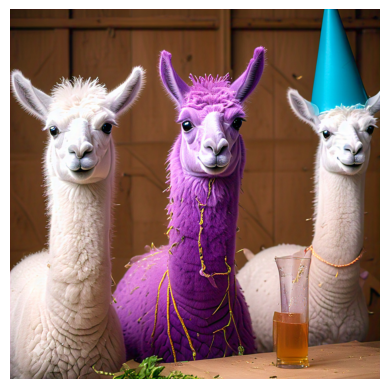

The image depicts three llamas, one of which is wearing a party hat, sitting at a table with a glass of liquid in front of them.


In [26]:
disp_image(image_url)
result = llama32(messages,90)
print(result)

## Follow up question about an image

In [27]:
messages = [
  {"role": "user",
    "content": [
      {"type": "text",
        "text": "describe the image in one sentence"
      },
      {"type": "image_url",
        "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"}
      }
    ]
  },
  {"role": "assistant", "content": result},
  {"role": "user", "content": "how many of them are purple?"}
]

In [28]:
result = llama32(messages)
print(result)

One of the llamas is purple.


### Define llama32pi() helper

In [29]:
def llama32pi(prompt, image_url, model_size=90):
  messages = [
    {
      "role": "user",
      "content": [
        {"type": "text",
          "text": prompt},
        {"type": "image_url",
          "image_url": {
            "url": image_url}
        }
      ]
    },
  ]
  result = llama32(messages, model_size)
  return result

In [30]:
print(llama32pi("describe the image in one sentence",
                "https://raw.githubusercontent.com/meta-llama/"
                "llama-models/refs/heads/main/Llama_Repo.jpeg"))

The image depicts three llamas, one of which is purple and wearing a party hat, standing behind a table with a glass of beer on it.


In [32]:
print(llama32pi("describe the image in one sentence",
                f"data:image/jpeg;base64,{base64_image}"))

The image depicts three llamas, one of which is wearing a party hat, sitting at a table with a glass of liquid in front of them.


## Plant recognition

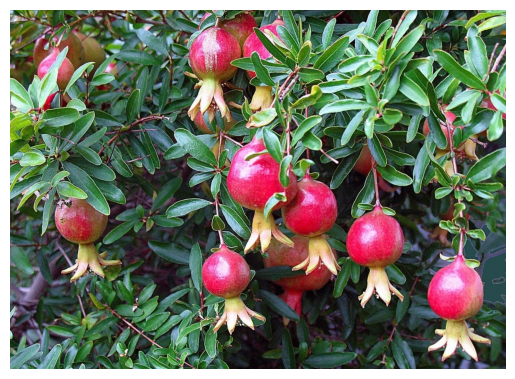

In [33]:
disp_image("images/tree.jpg")

In [34]:
question = ("What kind of plant is this in my garden?"
            "Describe it in a short paragraph.")

In [35]:
base64_image = encode_image("images/tree.jpg")
result = llama32pi(question, f"data:image/jpg;base64,{base64_image}")
print(result)

The plant in your garden is a pomegranate tree, scientifically known as Punica granatum. It is a deciduous shrub or small tree that can grow up to 12 feet tall. The leaves are dark green, glossy, and oval-shaped, with a pointed tip. The flowers are red and bell-shaped, and they bloom in the spring. The fruit is a large, leathery berry with a hard, woody rind that contains hundreds of juicy arils, which are the edible seeds surrounded by a fleshy pulp. Pomegranate trees prefer full sun and well-drained soil, and they are relatively low-maintenance. They are also drought-tolerant, but they will produce more fruit if they receive regular watering.


## Dog breed recognition

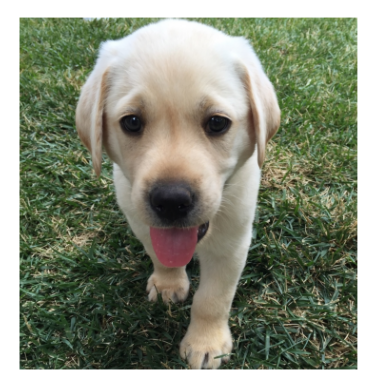

In [36]:
disp_image("images/ww1.jpg")

In [37]:
question = (("What dog breed is this? Describe in one paragraph,"
             "and 3-5 short bullet points"))
base64_image = encode_image("images/ww1.jpg")
result = llama32pi(question, f"data:image/jpg;base64,{base64_image}")
print(result)

The dog breed depicted in the image is a Labrador Retriever, specifically a yellow Labrador puppy. The image showcases the puppy's distinctive features, including its short, dense coat and broad head with a well-defined stop (the area where the muzzle meets the forehead). The puppy's ears are hanging down to the side of its head, and its eyes are dark brown. Its tongue is pink and slightly protruding from its mouth.

Here are some key characteristics of the Labrador Retriever breed:

* **Coat:** Short, dense, and straight
* **Color:** Yellow, black, or chocolate
* **Size:** Medium to large (55-80 pounds)
* **Temperament:** Friendly, outgoing, and energetic
* **Intelligence:** Highly intelligent and easily trainable


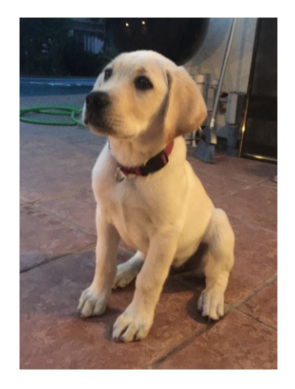

In [38]:
disp_image("images/ww2.png")

In [39]:
base64_image = encode_image("images/ww2.png")
result = llama32pi(question, f"data:image/png;base64,{base64_image}")
print(result)

The dog breed depicted in the image is a Labrador Retriever. This conclusion can be drawn from several key characteristics:

*   **Physical Appearance:** The dog has a short, dense coat that is yellow in color, which is one of the three main colors for Labradors (the others being black and chocolate). Its ears are floppy, and its tail is long and straight, both typical features of the breed.
*   **Size and Build:** Although the dog appears to be a puppy, its size and build suggest it will grow into a medium to large-sized dog, consistent with the Labrador breed's adult size range.
*   **Facial Features:** The dog's face, with its broad skull, well-defined stop (the area where the muzzle meets the forehead), and friendly expression, aligns with the breed standard for Labradors.

**Key Characteristics:**

*   **Coat Color:** Yellow
*   **Ear Type:** Floppy
*   **Tail Type:** Long and straight
*   **Expected Adult Size:** Medium to large


## Tire pressure warning

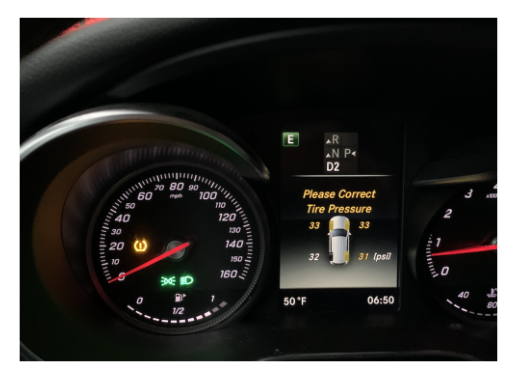

In [40]:
disp_image("images/tire_pressure.png")

In [41]:
question = (("What's the problem this is about?"
             " What should be good numbers?"))

In [42]:
base64_image = encode_image("images/tire_pressure.png")
result = llama32pi(question, f"data:image/png;base64,{base64_image}")
print(result)

The image shows a dashboard warning light for low tire pressure. The recommended tire pressure is 33 psi, but the current pressure is 31 psi. This indicates that the tire pressure is slightly below the recommended level.

To resolve this issue, you should check the tire pressure and inflate it to the recommended level of 33 psi. It's important to note that underinflated tires can lead to reduced fuel efficiency, uneven tire wear, and increased risk of a blowout. Therefore, it's essential to address this issue promptly to ensure safe and efficient driving.
